In [1]:
import emme as em
import anon
import jax
# anon.conf.config.update('jax_disable_jit', True)
import numpy as np
import anon.atom as anp
from anon import quad
import matplotlib.pyplot as plt
plt.style.use("typewriter")
SAVE_FIGS = True

In [2]:
from elle_0001 import elem_0001

In [3]:
def build(nel,elem):
    model = em.SkeletalModel(1,1)
    L = 1.0
    nen = 5
    tag = 1
    model.node('1.1',0)
    for i in range(nel):
        nodes = [model.nodes[-1]]
        for j in range(1,nen):
            nodes.append(model.node(f"{i+1}.{j+1}", i*L/nel + (j)*(L/nel)/(nen-1)))
        model.elem(elem,nodes,f"{i}")
    model.boun("1.1", [1])
    model.boun(f"{nel}.{nen}", [1])
    
    return model
def solve(model):
    f = model.assemble_force()
    return anp.linalg.solve(anon.diff.jacx(f)(*f.origin[:3]),-f(*f.origin[:3])[1])

In [4]:
alpha = 1/100
a1 = -alpha
# Source term, f
f = lambda x: anp.pi**2/100*sum(anp.sin((2*k+1)*anp.pi*x) for k in range(5))
# Exact solution
u = lambda x: -1/100/a1*sum(anp.sin((2*k+1)*anp.pi*x)/(2*k+1)**2 for k in range(5))
elem = elem_0001(f, a1, 0,order=9)

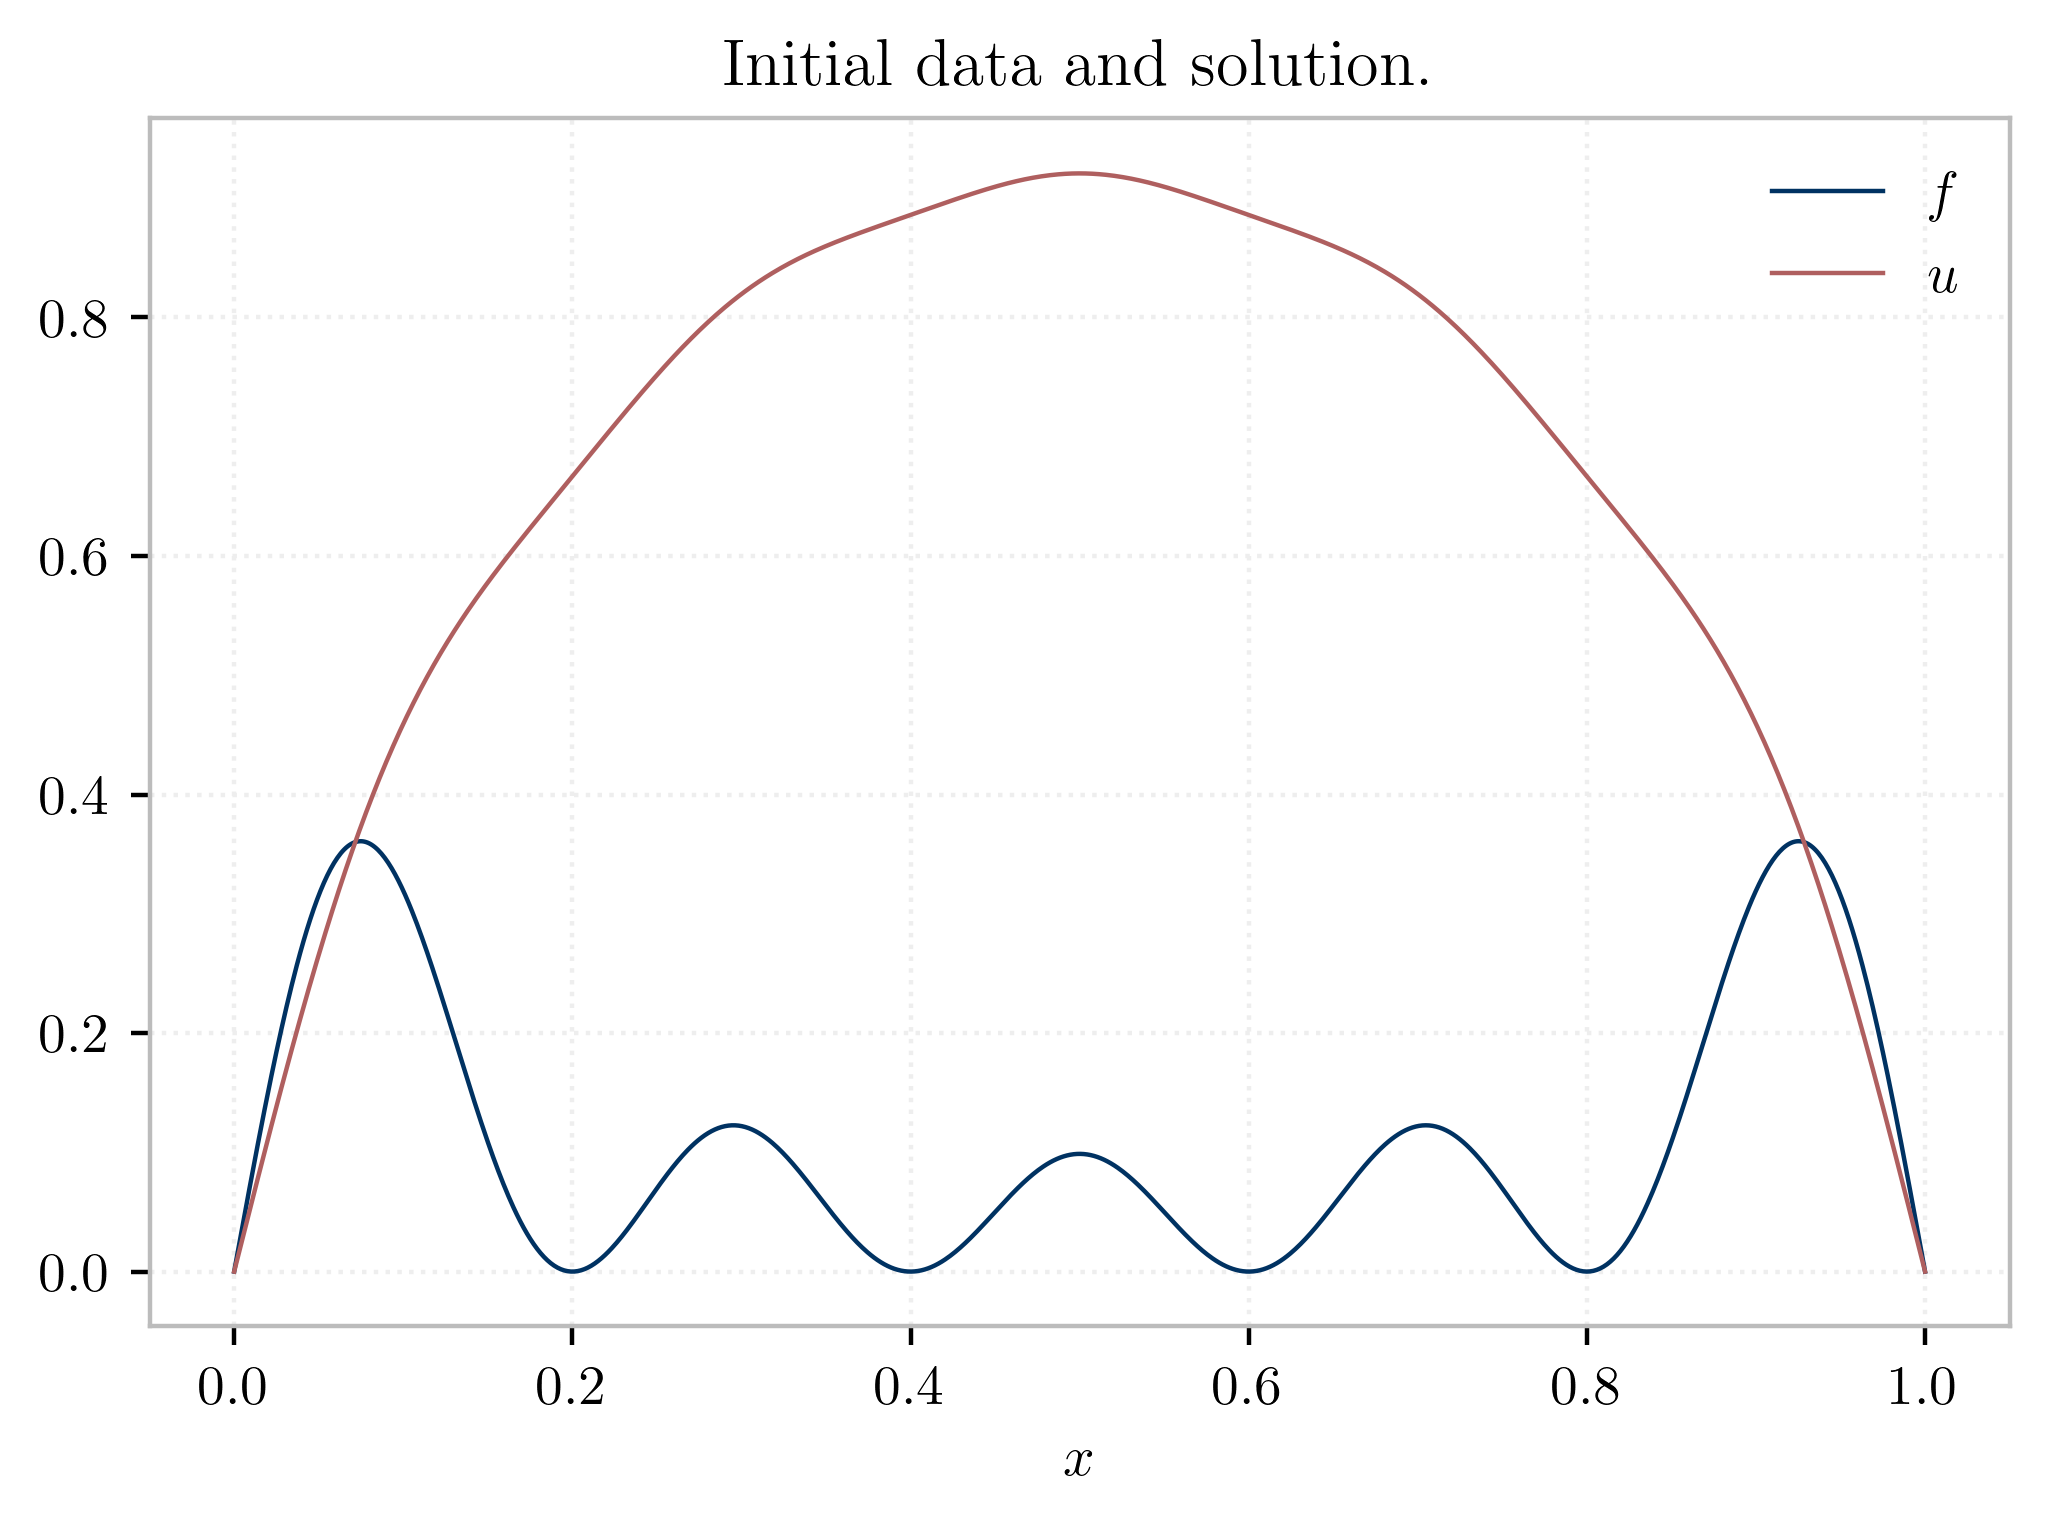

In [5]:
fig, ax = plt.subplots()
ax.plot(*zip(*[[x, f(x)] for x in anp.linspace(0,1,1000)]),label="$f$")
ax.plot(*zip(*[[x, u(x)] for x in anp.linspace(0,1,1000)]),label="$u$")
ax.legend()
ax.set_xlabel("$x$")
ax.set_title("Initial data and solution.")
if SAVE_FIGS: fig.savefig("./img/p3a-exact.png")

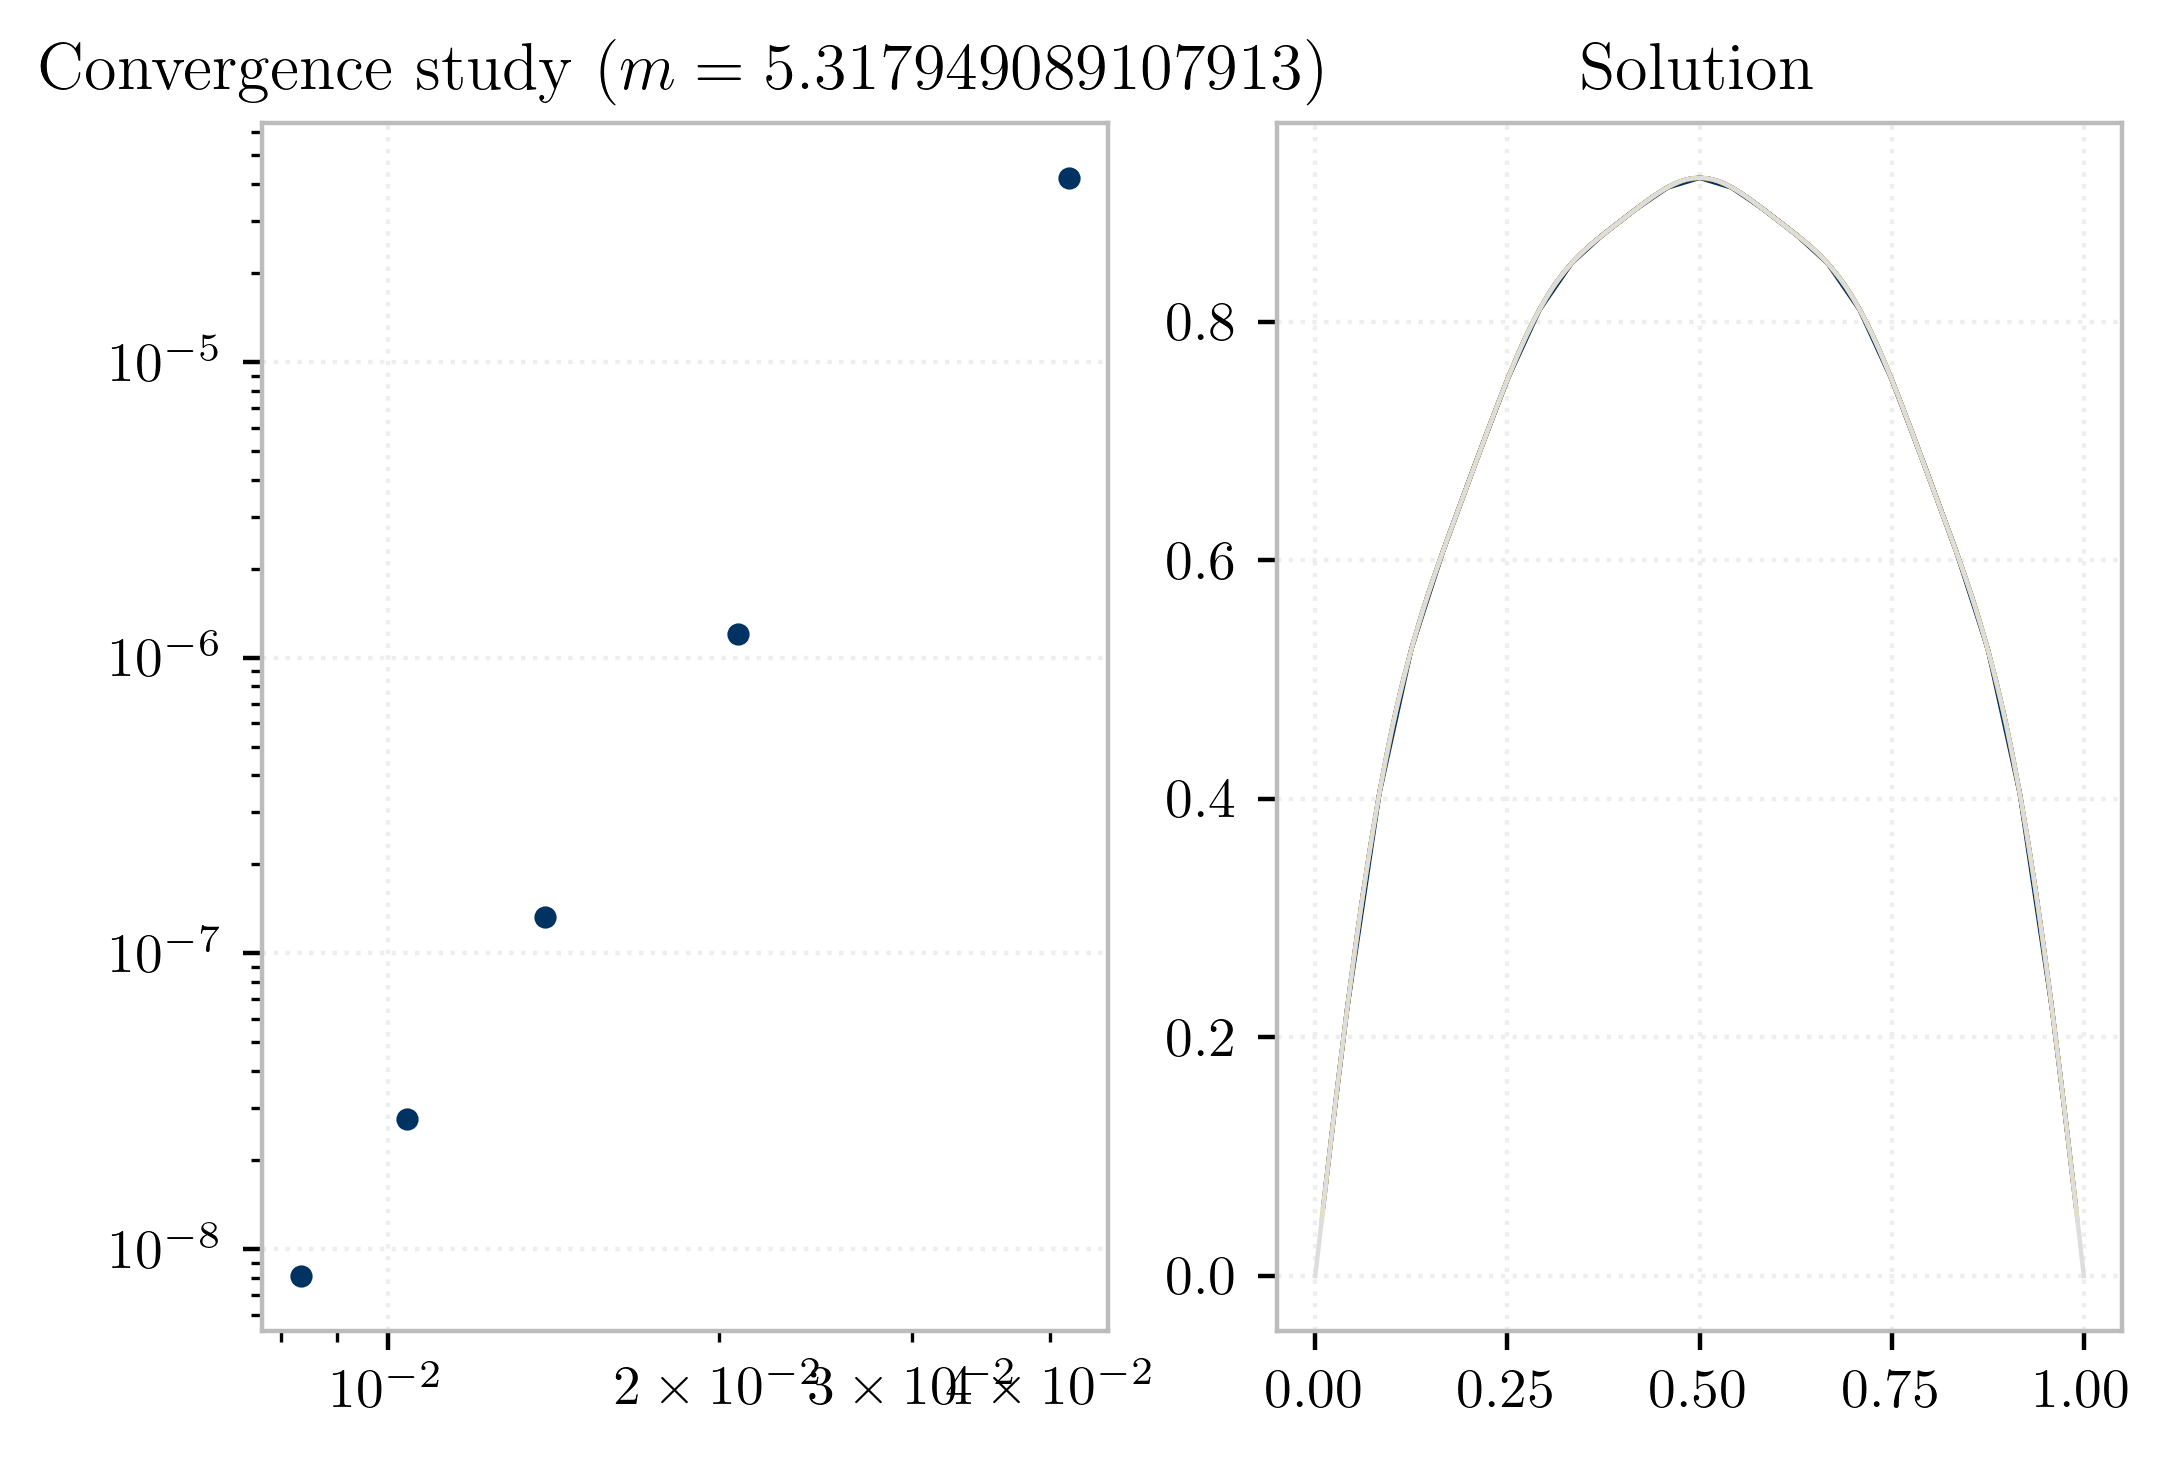

In [6]:
e = []
h = []
fig, ax = plt.subplots(1,2)
for n in range(6,36,6):
    model = build(n,elem)
    U = solve(model)
    x = anp.linspace(model.nodes[1].x,model.nodes[-2].x,n*4-1)
    h.append(model.nodes[1].x)
    e.append(model.nodes[1].x*anp.linalg.norm(U - u(x)[:,None]))
    ax[1].plot([n.x for n in model.nodes[1:model.nf+1] ], U.flatten())
ax[1].plot(*zip(*[[x, u(x)] for x in anp.linspace(0,1,1000)]))
ax[1].set_title("Solution")
slope, ss = np.polyfit(np.log(h), np.log(e), 1)

ax[0].loglog(h,e,".")
ax[0].set_title(f"Convergence study ($m={slope}$)")
if SAVE_FIGS: fig.savefig("./img/p3a-conv.png")

In [7]:
build(4,elem).compose_force()()

DeviceArray([[ 0.02336835],
             [ 0.01175451],
             [ 0.00216136],
             [ 0.0025681 ],
             [ 0.00961969],
             [-0.00201488],
             [ 0.00474508],
             [ 0.00361842],
             [ 0.00474508],
             [-0.00201488],
             [ 0.00961969],
             [ 0.0025681 ],
             [ 0.00216136],
             [ 0.01175451],
             [ 0.02336835]], dtype=float64)